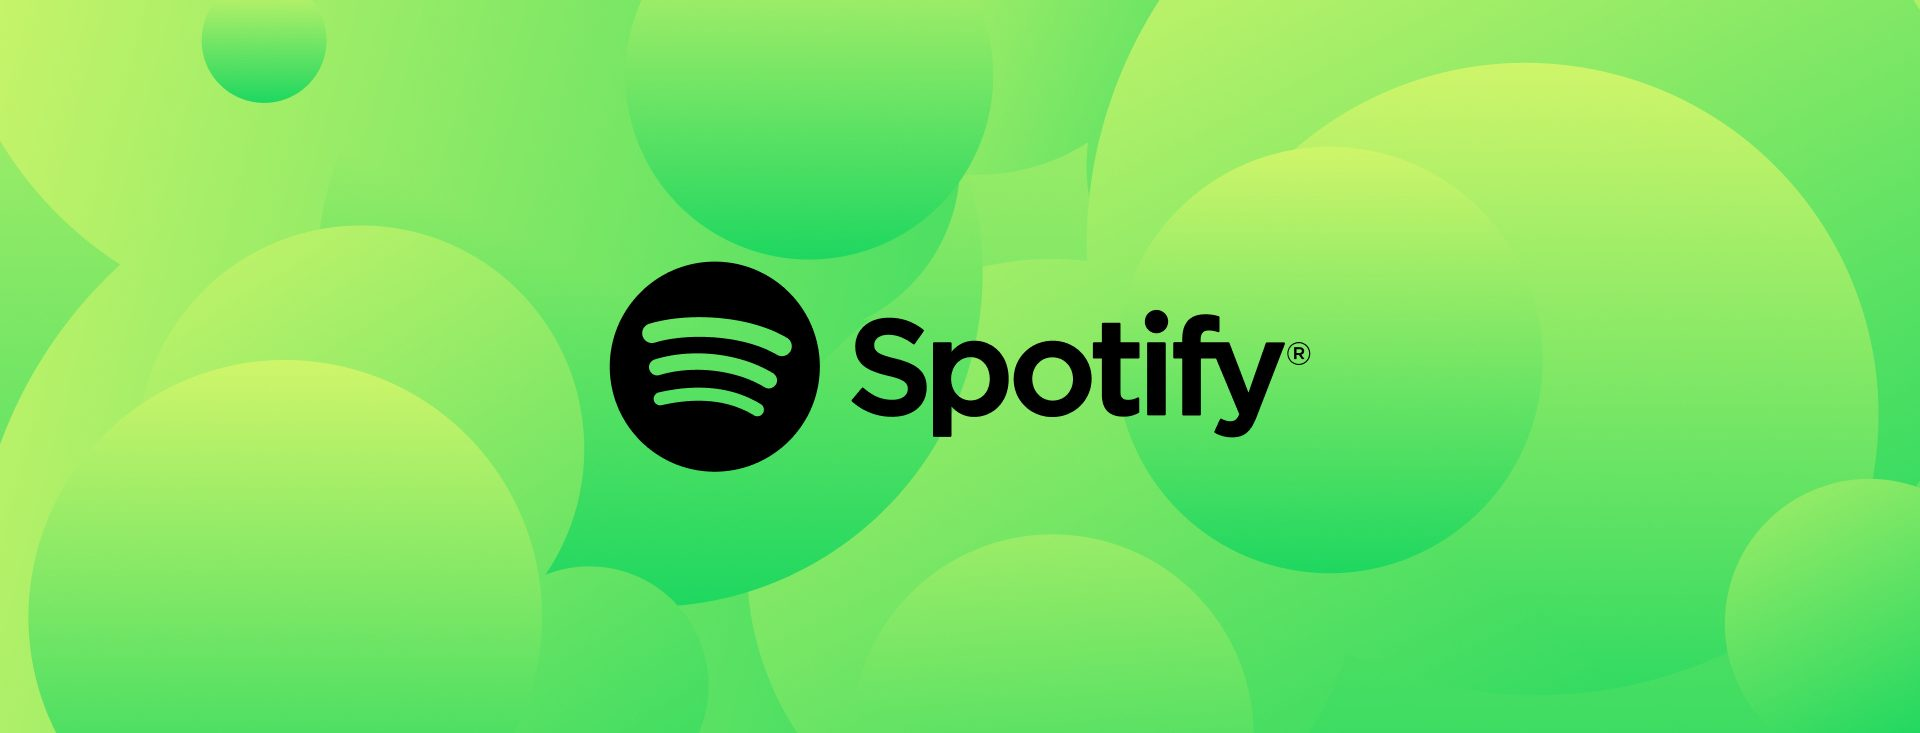

<center>

# **Spotify Music Recommendation**

<center> 

# Project Overview

---
This project will create a recommendation system for Spotify songs from two aspects (General Song Popularity & Numerical Song Features).The goal of this project is to deliver song recommendations that could satisfy both public trends and personalized preferences, increasing user engagement and satisfaction.

---

# About the Data

---
The data is provided by Kaggle, you can open the following link to access the original data and detailed description:

https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs

---
<center>

<center>

# Importing Necessary Packages

In [83]:
# loading necessary packages
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics.pairwise import cosine_similarity


warnings.filterwarnings("ignore")

<center>

# Loading Data

In [36]:
# Loading data
spotify = pd.read_csv("D:/DA/PYTHON/project/spotify_songs.csv",encoding='ISO-8859-1')
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [37]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [38]:
spotify.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


<center>


# Data Cleaning



In [39]:
# Checking Na values
spotify.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

<center>


----
We found missing values in the **track_name, track_artist, and track_album_name**. Since track_name is an essential feature in song recommendation, and 5 missing values contribute a tiny portion of the whole dataset, we will simply drop the Na values.

---


In [40]:
# Dropping Na
spotify = spotify.dropna()
spotify.isna().any()


track_id                    False
track_name                  False
track_artist                False
track_popularity            False
track_album_id              False
track_album_name            False
track_album_release_date    False
playlist_name               False
playlist_id                 False
playlist_genre              False
playlist_subgenre           False
danceability                False
energy                      False
key                         False
loudness                    False
mode                        False
speechiness                 False
acousticness                False
instrumentalness            False
liveness                    False
valence                     False
tempo                       False
duration_ms                 False
dtype: bool

In [41]:
# Checking duplicates 
spotify["track_id"].duplicated().sum()


4476

In [42]:
spotify["track_id"].value_counts()

7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
0sf12qNH5qcw8qpgymFOqD     8
7h0d2h0fUmzbs7zeFigJPn     8
                          ..
3AKwyujeGxTQSZNbx9Ka3c     1
3ITvHA9zhZZdBJsOsAUegF     1
5gsW8TMmNVnevjq13h0Nlp     1
4pN4icvWINm9uN3bElfbec     1
29zWqhca3zt5NsckZqDf6c     1
Name: track_id, Length: 28352, dtype: int64

<center>

-----------
Strangely, there seems to have many duplicated songs in the dataset.

Let's find out why this is the case.

-------

In [43]:
# Diagnosing duplicates
spotify[spotify["track_id"] == "7BKLCZ1jbUBVqRi2FVlTVw"]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
133,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
1731,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
2478,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
4535,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,A Loose Definition of Indie Poptimism,4ZO0wp9G8FA3X6oYNBzda6,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
7369,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,â¤ Hip Hop Dance Music â Urban â Trap â...,0Hr2h94pKN8QAGVAgD6BsD,rap,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
17467,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Tropical House Run 190 BPM,37i9dQZF1DWSTc9FdySHtz,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
18358,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits â Top Global Tracks ð...,4JkkvMpVl4lSioqQjeAL0q,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
19770,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits â Top Global Tracks ð...,4JkkvMpVl4lSioqQjeAL0q,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
23784,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits â Top Global Tracks ð...,4JkkvMpVl4lSioqQjeAL0q,r&b,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
30629,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2015 songs,6UJw1egIcZVfrBmcKs5uHH,edm,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960


<center>

-----------
It turns out that one song can exist in multiple playlists. Since playlist is not our focus, we can drop the duplicates to facilitate further analysis.

-------

In [44]:
# Dropping duplicates
spotify.drop_duplicates("track_id",inplace=True)
spotify["track_id"].value_counts()

6f807x0ima9a1j3VPbc7VN    1
5IVuqXILoxVWvWEPm82Jxr    1
4qRaZYiaOsSvWC7VgcxrI0    1
5aj0xPGiEUN3aI2oOYu14S    1
4TnUKixNWMfajncgdSwFoi    1
                         ..
7fXl3E41dDq3dfcC07VOgs    1
4etV43Qb0OBbMcxiLDVwSo    1
7gkHUletkecTClqfRLKboa    1
3wZGqsIjAMd9w0nrxG4xby    1
29zWqhca3zt5NsckZqDf6c    1
Name: track_id, Length: 28352, dtype: int64

In [45]:
# Reset index
spotify = spotify.reset_index(drop=True)
spotify.index

RangeIndex(start=0, stop=28352, step=1)

In [46]:
# Changing release_date data type
spotify["track_album_release_date"] =pd.to_datetime(spotify["track_album_release_date"])

In [47]:
# Dropping unwanted columns
spotify = spotify.drop(['track_id','track_album_id','playlist_id'],axis=1)
spotify.head()


,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


<center>

-----------
With cleanning, our data is now ready for analysis!

-------

<center>

# Feature Distribution


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'dance pop'),
  Text(1, 0, 'post-teen pop'),
  Text(2, 0, 'electropop'),
  Text(3, 0, 'indie poptimism'),
  Text(4, 0, 'hip hop'),
  Text(5, 0, 'southern hip hop'),
  Text(6, 0, 'gangster rap'),
  Text(7, 0, 'trap'),
  Text(8, 0, 'album rock'),
  Text(9, 0, 'classic rock'),
  Text(10, 0, 'permanent wave'),
  Text(11, 0, 'hard rock'),
  Text(12, 0, 'tropical'),
  Text(13, 0, 'latin pop'),
  Text(14, 0, 'reggaeton'),
  Text(15, 0, 'latin hip hop'),
  Text(16, 0, 'urban contemporary'),
  Text(17, 0, 'hip pop'),
  Text(18, 0, 'new jack swing'),
  Text(19, 0, 'neo soul'),
  Text(20, 0, 'electro house'),
  Text(21, 0, 'big room'),
  Text(22, 0, 'pop edm'),
  Text(23, 0, 'progressive electro house')])

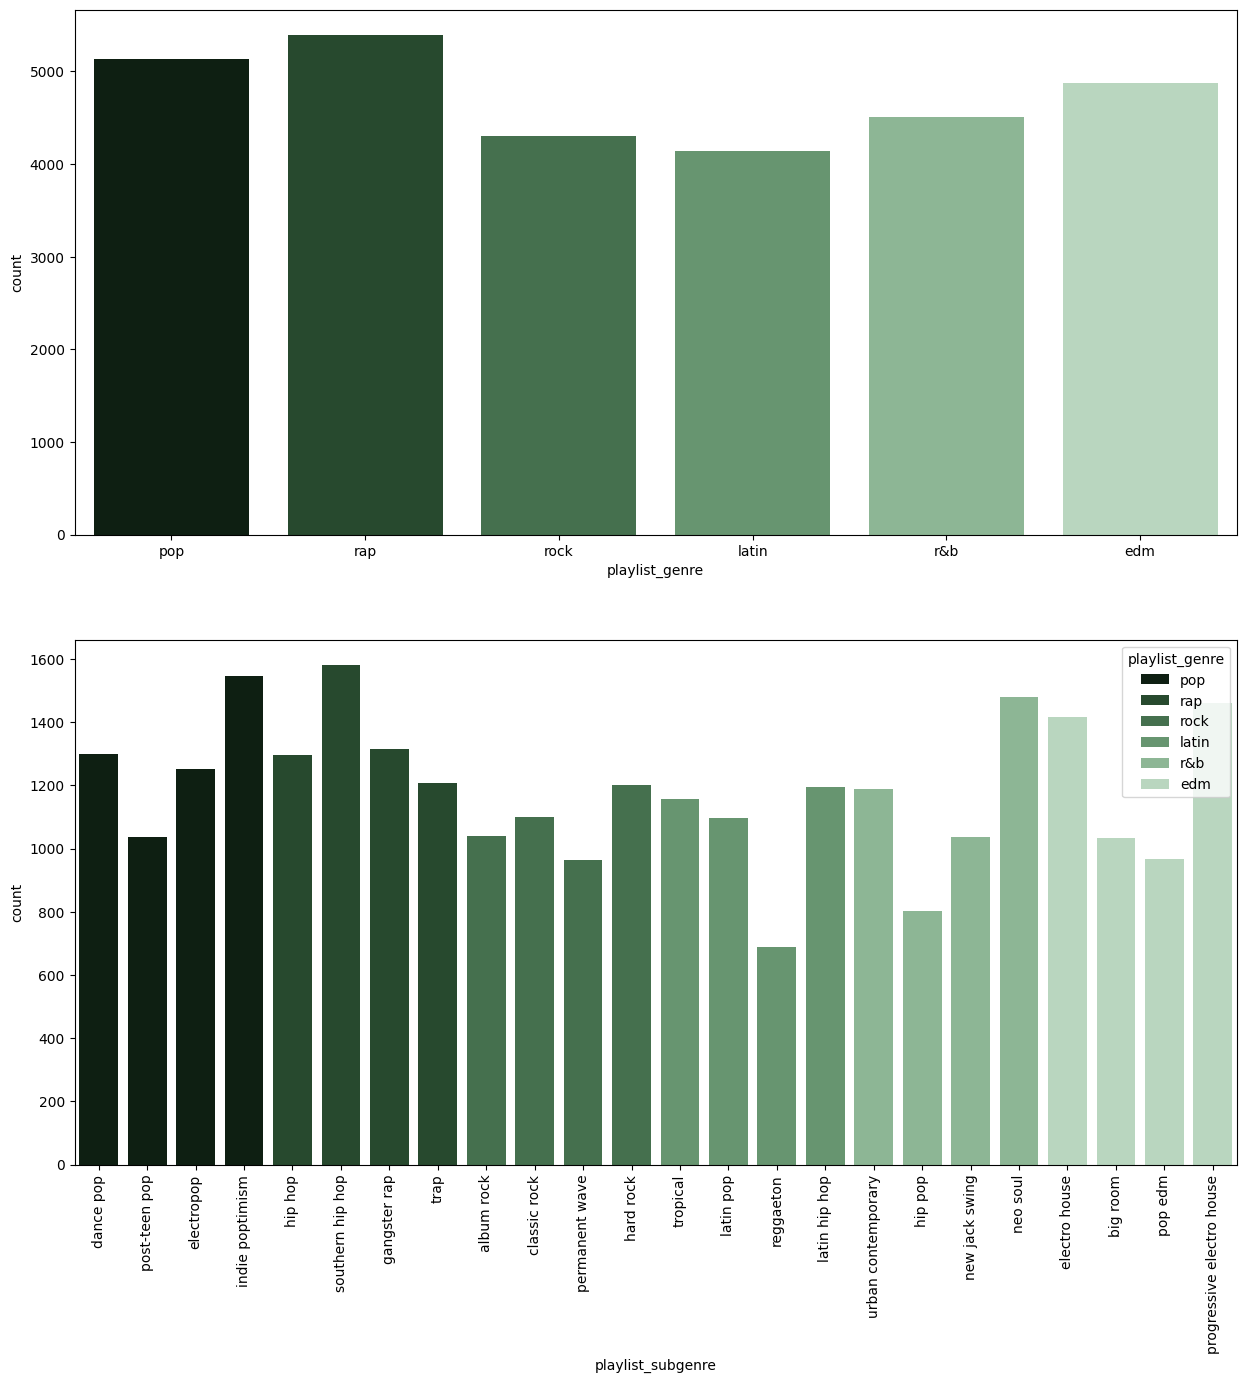

In [48]:
# Plotting Genre and Subgenre distribution
fig, axs = plt.subplots(2,1,figsize = (15,15)) 
pale = sns.cubehelix_palette(start=2, rot=0, dark=.1, light=.8, reverse=True)
sns.set_palette(pale)
sns.countplot(x = spotify["playlist_genre"],ax=axs[0])
sns.countplot(x = spotify["playlist_subgenre"],dodge=False,ax=axs[1],hue = spotify["playlist_genre"])
plt.xticks(rotation = 90)

---
Our genre is quite evenly distributed, with rap and pop have slightly more songs than the other four genres.

---

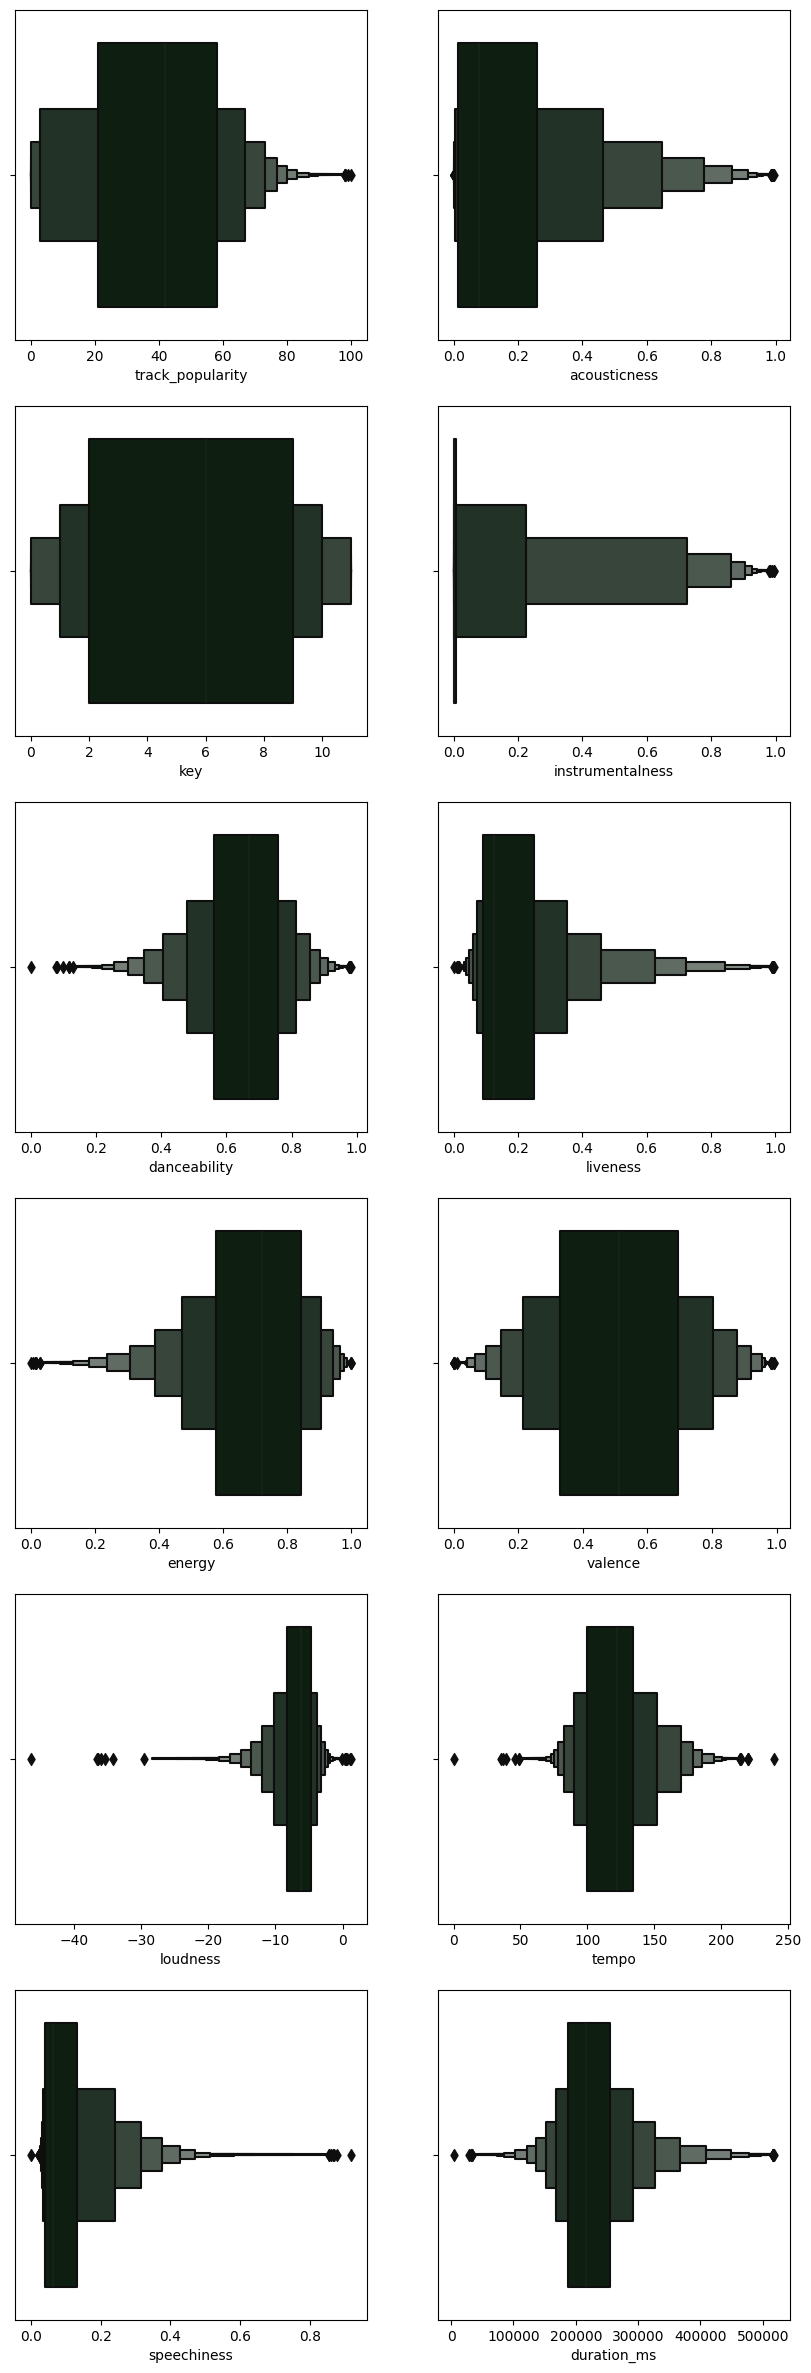

In [49]:
# Plotting Numerical Feature Distribution
feature_list = ["track_popularity","key","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]
fig, axs = plt.subplots(6,2,figsize = (10,30)) 
cnt = 0
for i in feature_list:
    col = cnt//6
    row = cnt%6
    sns.boxenplot(data=spotify,x=i,ax=axs[row,col])
    cnt += 1 

---
Many of the numerical features (e.g. speechiness, liveliness) are highly skewed.

---

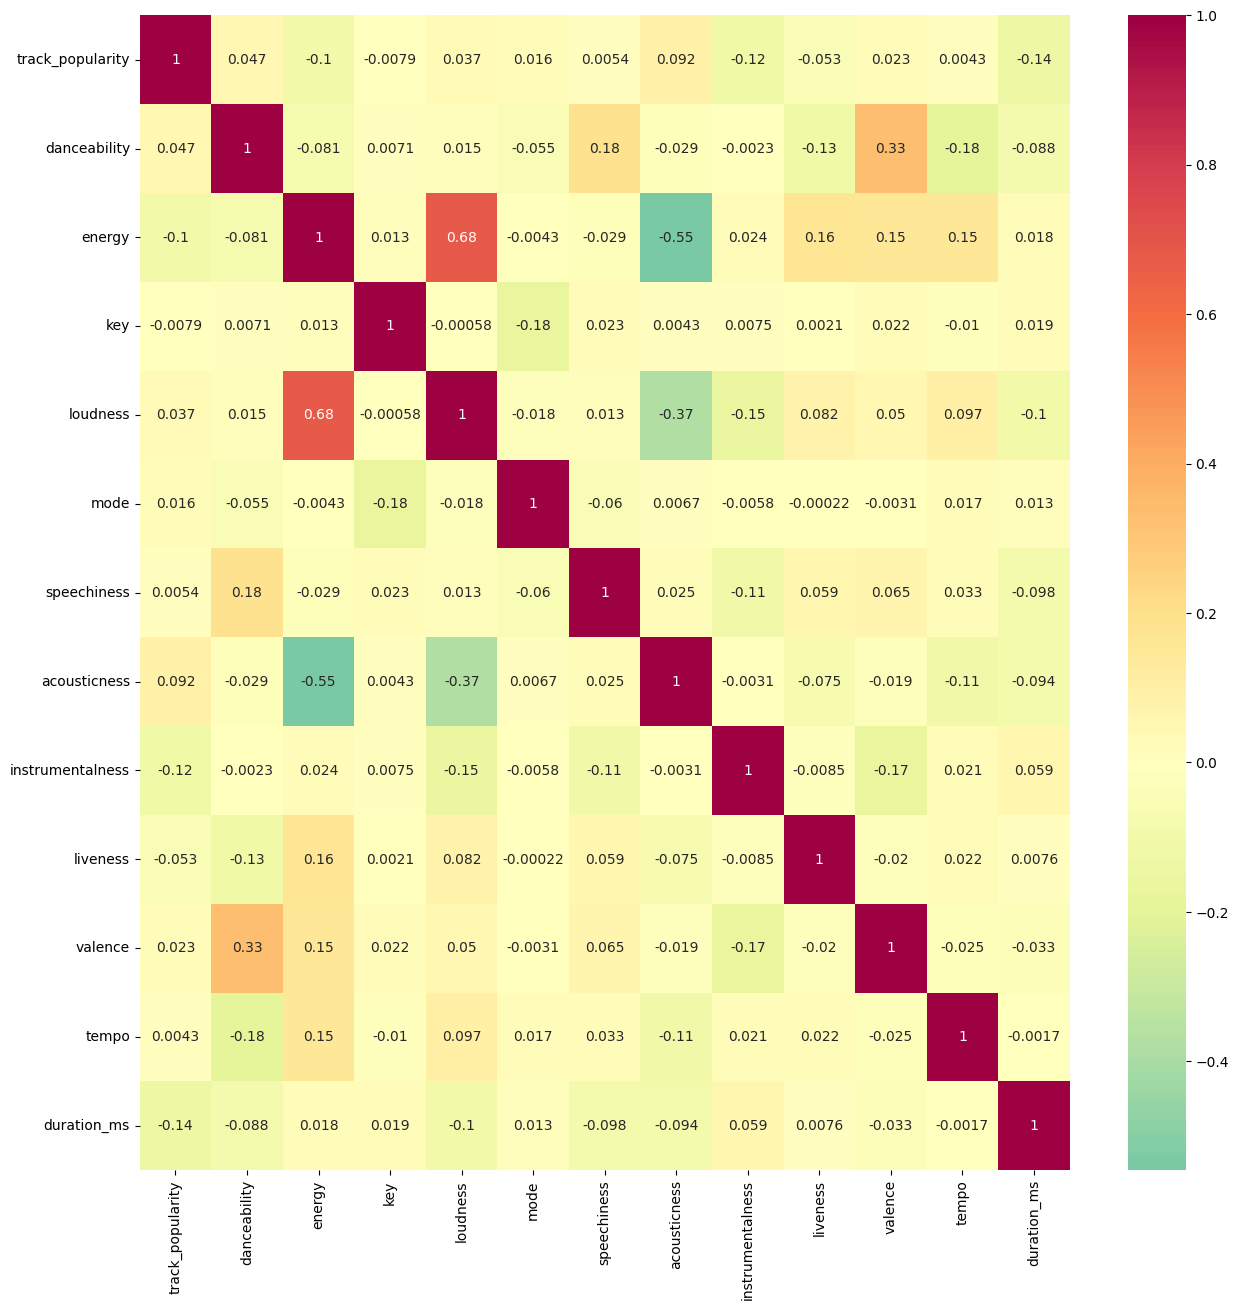

In [50]:
# Plotting Correlation Matrix
plt.figure(figsize=(15,15))
heat = sns.heatmap(spotify.corr(),annot=True,center = 0,cmap="Spectral_r")

---
The numerical features don't have the issue of multicollinearity. The only outstanding correlation:

Energy is positively correlated with loudness and negatively correlated with acousticness

---

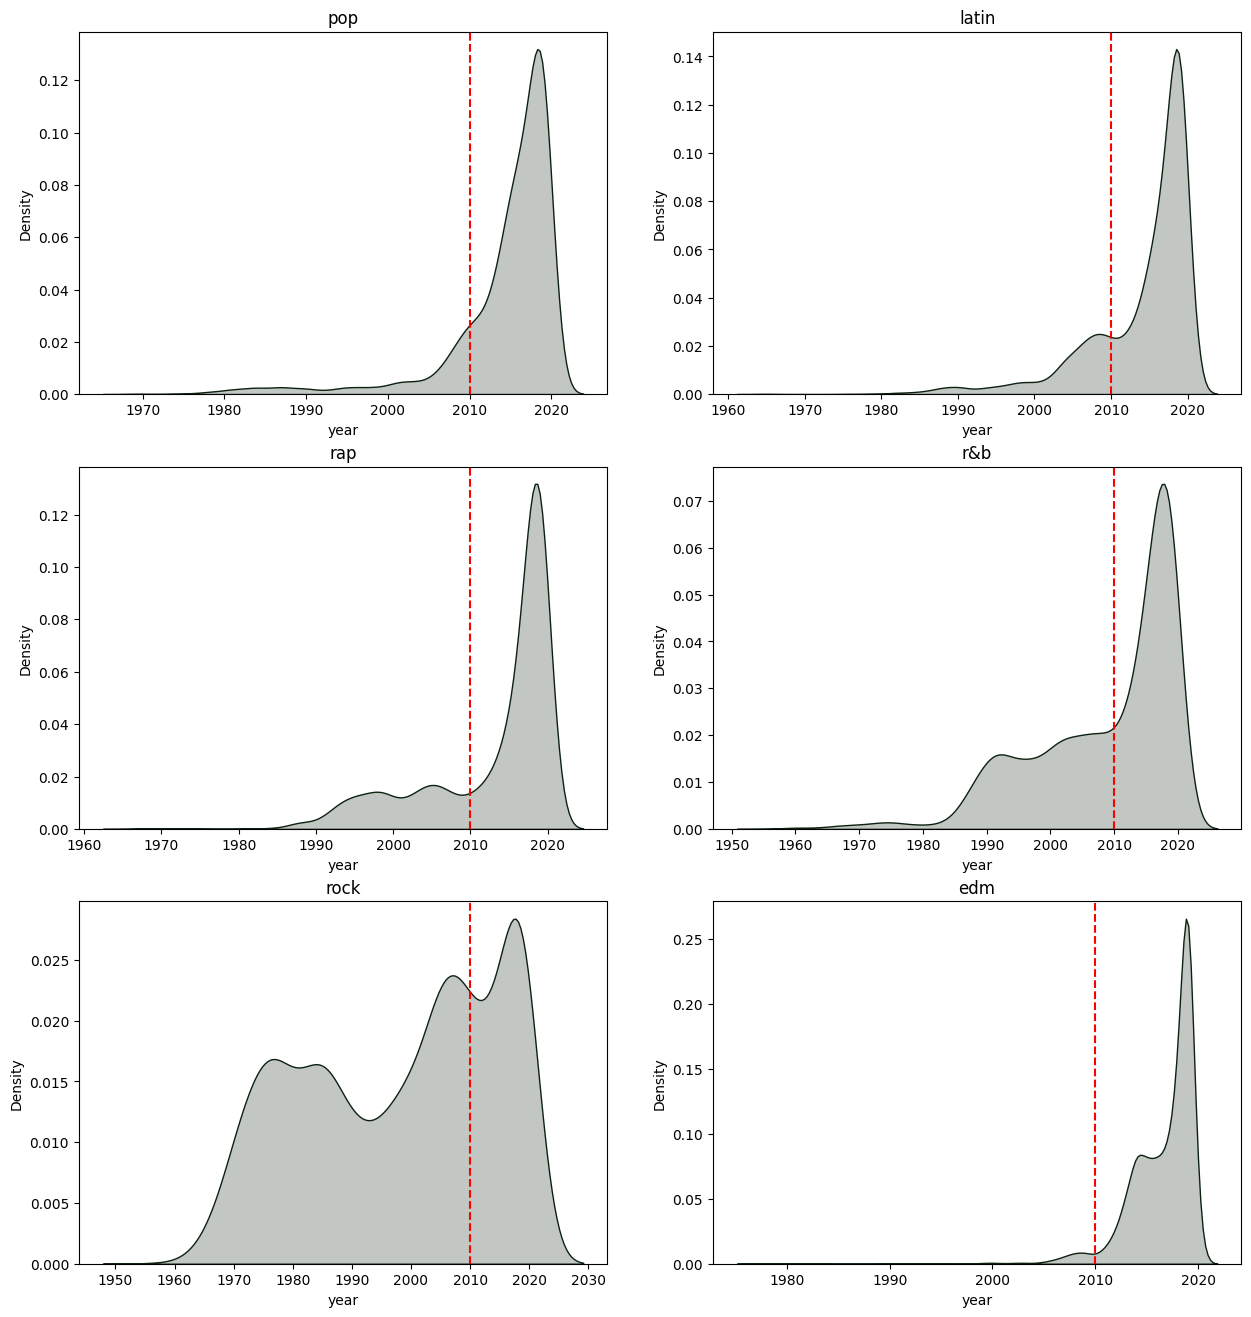

In [51]:
# Plotting Song publication over years
spotify["year"] = spotify["track_album_release_date"].dt.year
fig, axs = plt.subplots(3,2,figsize = (15,16))
cnt = 0 
for genre in spotify["playlist_genre"].unique():
    col = cnt//3
    row = cnt%3
    sns.kdeplot(spotify[spotify["playlist_genre"] == genre]["year"],ax=axs[row,col],shade = True,)
    axs[row,col].axvline(2010,color = "red", linestyle = "--")
    axs[row,col].set_title(genre)
    cnt += 1

---
There is a sudden spike of song production after 2010 for most genres. 

Except Rock: it has been massively published since 1970s

---

<center>


# Popularity Based Recommendation

---
Popularity Based Recomendation offers generalized recommendations based on track popularity. 

The logic behind this approach is that songs with higher popularity will have a higher chance to be liked by the average user.

Our first step is to discover the most popular genres and artists.

---

Text(0.5, 1.0, 'Genre Popularity')

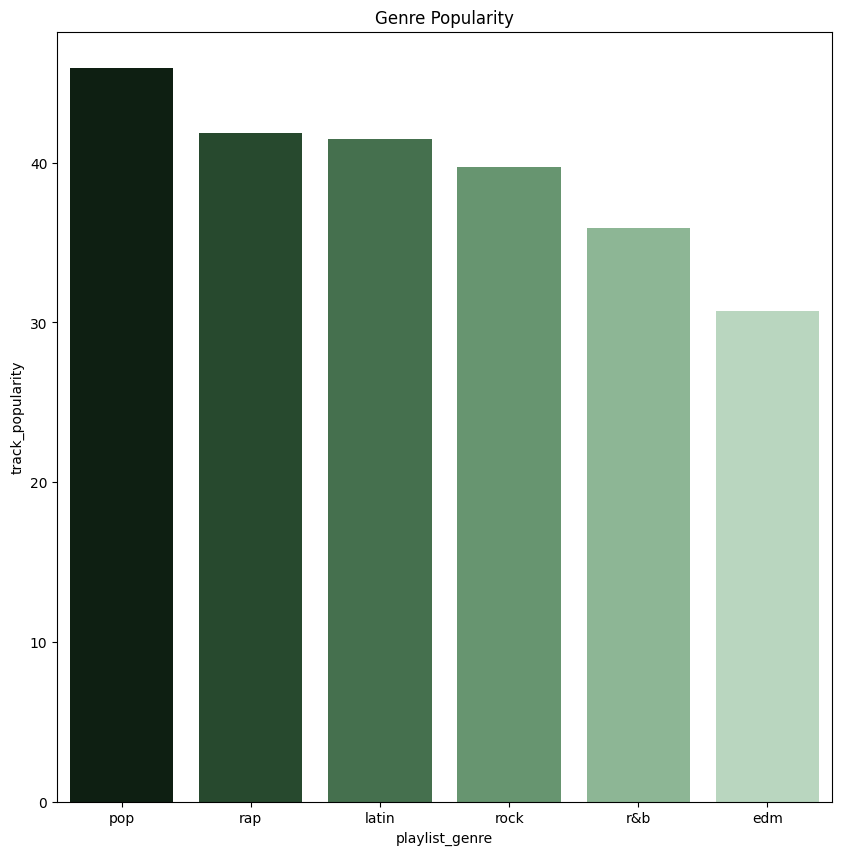

In [52]:
# Plotting most popular genres
fig = plt.figure(figsize=(10,10))
genre_pop = spotify.groupby(["playlist_genre"])["track_popularity"].mean().reset_index()
genre_pop = genre_pop.sort_values(by = "track_popularity",ascending=False)
sns.barplot(data = genre_pop,x = "playlist_genre", y="track_popularity")
plt.title("Genre Popularity")

Text(0.5, 1.0, 'Top 5 Most Popular Artists')

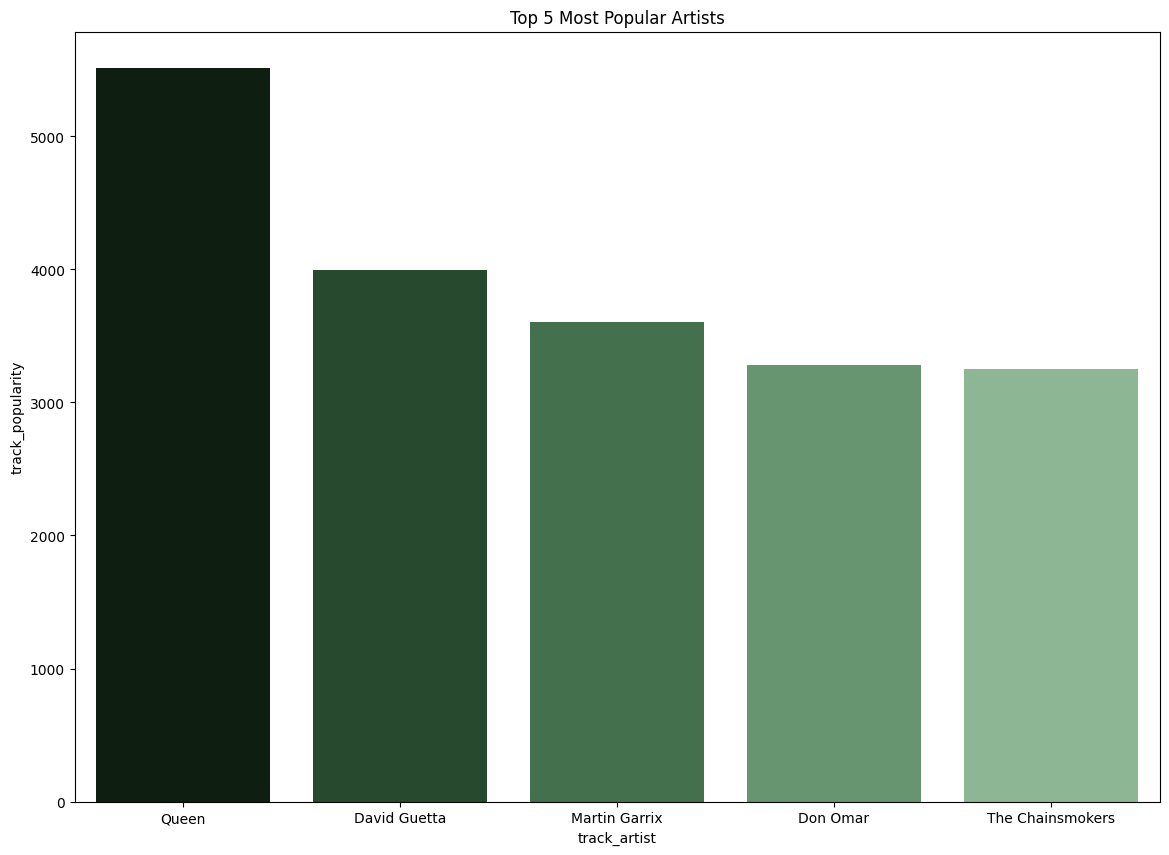

In [53]:
# Plotting most popular artists
plt.figure(figsize=(14,10))
artist_pop = spotify.groupby(["track_artist"])["track_popularity"].sum().reset_index()
artist_pop = artist_pop.sort_values(by = "track_popularity",ascending=False).head(5)
sns.barplot(data = artist_pop,x = "track_artist", y="track_popularity")
plt.title("Top 5 Most Popular Artists")

---
We have the list of the most popular genres and artists, now we will recommend the top 5 popular songs for each genre/artist.

---

In [54]:
# Subsetting the top5 artists
top_artist = list(artist_pop["track_artist"])
top_artist_list = spotify[spotify["track_artist"].isin(top_artist)]
top_artist_list

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,...,-3.778,1,0.1020,0.02870,0.000009,0.2040,0.277,121.956,169093,2019
14,Summer Days (feat. Macklemore & Patrick Stump ...,Martin Garrix,63,Summer Days (feat. Macklemore & Patrick Stump ...,2019-07-12,Pop Remix,pop,dance pop,0.690,0.780,...,-4.446,0,0.0594,0.00733,0.001830,0.0729,0.238,126.070,255238,2019
17,Say My Name (feat. Bebe Rexha & J Balvin) - Lu...,David Guetta,65,Say My Name (feat. Bebe Rexha & J Balvin) [Luc...,2018-12-28,Pop Remix,pop,dance pop,0.678,0.747,...,-5.289,0,0.1650,0.03950,0.000000,0.1740,0.516,120.002,189375,2018
22,Don't Leave Me Alone (feat. Anne-Marie) - EDX'...,David Guetta,62,Don't Leave Me Alone (feat. Anne-Marie) [EDX's...,2019-05-08,Pop Remix,pop,dance pop,0.684,0.818,...,-4.477,0,0.1280,0.04690,0.000003,0.1190,0.336,123.938,210968,2019
24,Do You Mean (feat. Ty Dolla $ign & bÃ¼low) - M...,The Chainsmokers,58,Do You Mean - The Remixes (feat. Ty Dolla $ign...,2019-05-24,Pop Remix,pop,dance pop,0.620,0.889,...,-3.785,1,0.0352,0.01630,0.000019,0.3950,0.422,110.018,205093,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28093,Breach (Walk Alone),Martin Garrix,52,BYLAW EP,2018-10-19,"Festival Music 2019 - Warm Up Music (EDM, Big ...",edm,progressive electro house,0.738,0.953,...,-4.781,1,0.2160,0.03880,0.014600,0.2140,0.483,128.069,178125,2018
28095,Lions in the Wild,Martin Garrix,57,Lions in the Wild,2016-05-27,"Festival Music 2019 - Warm Up Music (EDM, Big ...",edm,progressive electro house,0.504,0.847,...,-6.810,0,0.0442,0.00434,0.000000,0.8160,0.280,127.854,211890,2016
28097,Don't Leave Me Alone (feat. Anne-Marie) - Oliv...,David Guetta,49,Don't Leave Me Alone (feat. Anne-Marie) [Olive...,2018-08-31,"Festival Music 2019 - Warm Up Music (EDM, Big ...",edm,progressive electro house,0.739,0.818,...,-6.717,0,0.0612,0.00790,0.000056,0.3590,0.155,125.965,204224,2018
28261,Stay (Don't Go Away) [feat. Raye] - Nicky Rome...,David Guetta,54,Stay (Don't Go Away) [feat. Raye] [Nicky Romer...,2019-06-14,Trending EDM by Nik Cooper,edm,progressive electro house,0.593,0.907,...,-7.782,1,0.0477,0.00569,0.000637,0.1610,0.233,124.986,177889,2019


In [135]:
# Keep the top5 songs for each artist
top_artist_sorted  = top_artist_list.sort_values(by = ["track_artist", "track_popularity"],ascending=False)
top5_songs = top_artist_sorted.groupby("track_artist").head().reset_index(drop=True)
top5_songs

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,Closer (feat. Halsey),The Chainsmokers,85,Closer (feat. Halsey),2016-07-29,Dance Pop,pop,dance pop,0.748,0.524,...,-5.599,1,0.0338,0.41400,0.000000,0.1110,0.661,95.010,244960,2016
1,Family,The Chainsmokers,85,World War Joy,2019-12-06,Dance Pop Tunes,pop,dance pop,0.584,0.607,...,-6.605,1,0.0356,0.42600,0.000000,0.1010,0.374,117.817,194827,2019
2,Takeaway,The Chainsmokers,85,World War Joy,2019-12-06,"post-teen alternative, indie, pop (large variety)",pop,post-teen pop,0.528,0.511,...,-8.144,1,0.0324,0.12600,0.000000,0.1010,0.351,100.100,209880,2019
3,Something Just Like This,The Chainsmokers,83,Memories...Do Not Open,2017-04-07,Dance Pop,pop,dance pop,0.617,0.635,...,-6.769,0,0.0317,0.04980,0.000014,0.1640,0.446,103.019,247160,2017
4,Don't Let Me Down,The Chainsmokers,81,Don't Let Me Down,2016-02-05,Pop InglÃ©s (2020 - 2010s)ð MÃºsica En Ingl...,pop,dance pop,0.532,0.869,...,-5.094,1,0.1720,0.15700,0.005080,0.1360,0.422,159.803,208373,2016
5,Bohemian Rhapsody - 2011 Mix,Queen,84,A Night At The Opera (2011 Remaster),1975-11-21,The Queen - La Discografia Completa,rock,album rock,0.414,0.404,...,-9.928,0,0.0499,0.27100,0.000000,0.3000,0.224,71.105,354320,1975
6,Don't Stop Me Now - 2011 Mix,Queen,83,Jazz (2011 Remaster),1978-11-10,The Queen - La Discografia Completa,rock,album rock,0.559,0.868,...,-5.276,1,0.1700,0.04750,0.000176,0.7760,0.609,156.295,209413,1978
7,Another One Bites The Dust - Remastered 2011,Queen,82,The Game (2011 Remaster),1980-06-27,The Queen - La Discografia Completa,rock,album rock,0.933,0.528,...,-6.472,0,0.1610,0.11200,0.312000,0.1630,0.754,109.967,214653,1980
8,Under Pressure - Remastered,Queen,81,Hot Space (2011 Remaster),1982-05-03,â¡âªâ â¨ mixed,rock,permanent wave,0.671,0.712,...,-7.815,1,0.0476,0.42900,0.000000,0.1030,0.462,113.805,248440,1982
9,We Will Rock You - Remastered,Queen,79,News Of The World (2011 Remaster),1977-10-28,The Queen - La Discografia Completa,rock,album rock,0.692,0.497,...,-7.316,1,0.1190,0.67600,0.000000,0.2590,0.475,81.308,122067,1977


In [56]:
# Convert the result to a wide dataframe for better readability
top5_songs = top5_songs.iloc[:,[0,1]]
top5_songs["song_rank"] = top5_songs.groupby("track_artist").cumcount()+1
wide_top5 = top5_songs.pivot(index="song_rank", columns="track_artist", values="track_name")
wide_top5.columns.name = "song_rank"
wide_top5.index.name = None
print("Searching for the most popular artists...")
wide_top5

Searching for the most popular artists...


song_rank,David Guetta,Don Omar,Martin Garrix,Queen,The Chainsmokers
1,Titanium (feat. Sia),Danza Kuduro,Used To Love (with Dean Lewis),Bohemian Rhapsody - 2011 Mix,Closer (feat. Halsey)
2,Say My Name,Dile,Summer Days (feat. Macklemore & Patrick Stump ...,Don't Stop Me Now - 2011 Mix,Family
3,Better When You're Gone,SaliÃ³ El Sol,Scared to Be Lonely,Another One Bites The Dust - Remastered 2011,Takeaway
4,Stay (Don't Go Away) [feat. Raye],Danza Kuduro,In the Name of Love,Under Pressure - Remastered,Something Just Like This
5,Like I Do,Ojitos Chiquitos,High On Life (feat. Bonn),We Will Rock You - Remastered,Don't Let Me Down


---
Awesome! We successfully created the recommendation list for popular artists. 

Now we will perform the same procedure to get the popular songs in each genre.

---

In [67]:
# Sort the dataset based on popularity
top_genre_sorted  = spotify.sort_values(by = ["playlist_genre", "track_popularity"],ascending=False)

# Keep the top 5 songs in each genre
top5_songs = top_artist_sorted.groupby("playlist_genre").head().reset_index(drop=True)

# Re-formatting the dataset
top5_songs = top5_songs.iloc[:,[0,6]]
top5_songs["song_rank"] = top5_songs.groupby("playlist_genre").cumcount()+1
wide_top5 = top5_songs.pivot(index="song_rank", columns="playlist_genre", values="track_name")
wide_top5.columns.name = "song_rank"
wide_top5.index.name = None
print("Searching for most popular songs in each genre...")
wide_top5


Searching for most popular songs in each genre...


song_rank,edm,latin,pop,r&b,rap,rock
1,Hold On (feat. Michel Zitron),Dile,Closer (feat. Halsey),Somebody,Play Hard (feat. Ne-Yo & Akon),Bohemian Rhapsody - 2011 Mix
2,Make It To Heaven (with Raye),SaliÃ³ El Sol,Family,Do You Mean (feat. Ty Dolla $ign & bÃ¼low),Memories (feat. Kid Cudi),Don't Stop Me Now - 2011 Mix
3,Your Love,Danza Kuduro,Takeaway,Who Do You Love,Siren,Another One Bites The Dust - Remastered 2011
4,No Sleep (feat. Bonn) - DubVision Remix,Ojitos Chiquitos,Something Just Like This,Sick Boy,Closer - T-Mass Remix,Under Pressure - Remastered
5,Don't Leave Me Alone (feat. Anne-Marie),Bandoleros,Used To Love (with Dean Lewis),NaN,Side Effects - Nolan van Lith Remix,We Will Rock You - Remastered


# Feature Based Recommendation

---
Our popularity based recommender works well, but this is not enough. Only choosing the top 5 does not represent all 30,000 songs in the dataset. Therefore, we need a more flexible recommendation system to cater personalized needs - Feature Based Recommendation. 

This recommendation system will take into account of different song features (e.g. danceability,valence,tempo,etc.) and compute similarities between songs and recommend songs that are most similar in style.

---

In [74]:
# Filter out non-numerical variables
cat_tf = spotify.dtypes == "object"
cat = list(spotify.columns[cat_tf])
print("The Categorical Variables in the Dataset Are:", cat)
model_dt = spotify.drop(cat,axis=1)

# Drop other unwanted variables
model_dt = model_dt.drop(["track_album_release_date","track_popularity"],axis=1)


The Categorical Variables in the Dataset Are: ['track_name', 'track_artist', 'track_album_name', 'playlist_name', 'playlist_genre', 'playlist_subgenre']


In [73]:
model_dt.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019
1,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019
2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019
3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019
4,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019


## Cosine Similarity
---
The algorithm we will be using is called **Cosine Similarity**. It calculates the cosine of the angle between two non-zero vectors in a multi-dimensional space. 

Cosine Similarity is a suitable tool for building a recommendation system:
- It quantifies the similarity between the vectors based on their orientation without considering their magnitude.
- It works well with high dimensional data.
- It is insensitive to scale differences, and thus does not require data scaling.

---

In [77]:
# Computing cosine similarity
sim_matrix = cosine_similarity(model_dt)

In [81]:
# Create feature recommendation
def get_similar_songs(song_name, n_recommendations=10):
    song_index = spotify.index[spotify["track_name"]==song_name][0] # get the song index
    sim_scores = sim_matrix[song_index]  # Get similarity scores for the input song
    similar_indices = sim_scores.argsort()[::-1][1:n_recommendations+1]  # Sort and exclude the song itself

    print("The song you like is:\n------------------------------------------------------")
    print(spotify.iloc[song_index][['track_name', 'track_artist', 'year','playlist_genre','playlist_subgenre']])
    print("-------------------------------------------------------")
    print("Searching for similar songs...\n-------------------------------------------------------\nHere is your personalized recommendation:") # Print the input song info

    return spotify.iloc[similar_indices][['track_name', 'track_artist', 'year','playlist_genre','playlist_subgenre']]  # Return similar songs info


---
Our feature recommendation system is ready to launch! Let's test how it works.

---

In [115]:
random_song = spotify["track_name"].sample(n=1).values[0]
get_similar_songs(random_song)

The song you like is:
------------------------------------------------------
track_name                              8Fifty
track_artist                          Hardwell
year                                      2016
playlist_genre                             edm
playlist_subgenre    progressive electro house
Name: 27311, dtype: object
-------------------------------------------------------
Searching for similar songs...
-------------------------------------------------------
Here is your personalized recommendation:


,track_name,track_artist,year,playlist_genre,playlist_subgenre
23677,PLAY,Tokyo Machine,2019,edm,electro house
25246,Invincible (feat. Ruby Prophet) - Radio Edit,Firebeatz,2015,edm,big room
28243,Who's Got Your Love - Mike Williams Remix,Cheat Codes,2019,edm,progressive electro house
27887,Soundwave - Radio Edit,R3HAB,2014,edm,progressive electro house
24242,Ruled the World,Hogland,2017,edm,electro house
27082,Don't Leave Me Alone (feat. Anne-Marie),David Guetta,2018,edm,progressive electro house
26051,Polaroid - R3HAB Remix,Jonas Blue,2018,edm,pop edm
26288,Where Is the Love,Alex Martura,2018,edm,pop edm
24270,Turn Up The Speakers,Afrojack,2014,edm,electro house
25121,Turn Up The Speakers,Afrojack,2014,edm,big room


---
The recommender provides 10 songs that have the same genre/subgenre as the input song, indicating a good performance of our recommendation system.

---

# Conclusion

In this project, I created two recommendation system for the Spotify song dataset: Popularity Based Recommendation for general trends and Feature Based Recommendation for personalized preferences.

## **Thank you for viewing this project!!**